## Importar librerias

# Análisis de Clustering con K-means
En este notebook se explora el algoritmo de clustering K-means utilizando datos sintéticos generados con `make_blobs`. Se visualizan los datos, se aplica el algoritmo y se evalúan los resultados para encontrar el número óptimo de clusters.

In [31]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


### Instalación de dependencias
Se instala la librería `yellowbrick` para visualización de métricas de clustering.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### Importación de librerías
Se importan las librerías necesarias para la generación de datos, visualización y aplicación de K-means.

## Preparando datos de prueba

### Generación de datos sintéticos
Se generan datos de prueba con `make_blobs`, especificando el número de muestras, desviación estándar, número de centros y características.

In [64]:
X, y, c = make_blobs(n_samples=500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [65]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:, 0],
        'x2': X[:, 1],
        'y': y
    }
)

### Creación de DataFrames
Se crean DataFrames para los datos generados y para los centros de los clusters.

In [66]:
df_center = pd.DataFrame(
    {
        'x1': c[:, 0],
        'x2': c[:, 1],
    }
)

In [67]:
df_blobs

,x1,x2,y
0,-1.866789,0.997754,3
1,9.035744,7.212938,0
2,-1.719657,2.190165,3
3,4.270234,-1.369104,2
4,8.366260,5.184709,0
...,...,...,...
495,7.990757,6.700393,0
496,8.327625,7.899901,0
497,8.748133,6.224306,0
498,1.460468,3.590499,1


### Visualización de los datos generados
Se visualizan los datos y los centros de los clusters para entender la distribución inicial antes de aplicar K-means.

## Visualizacion de datos

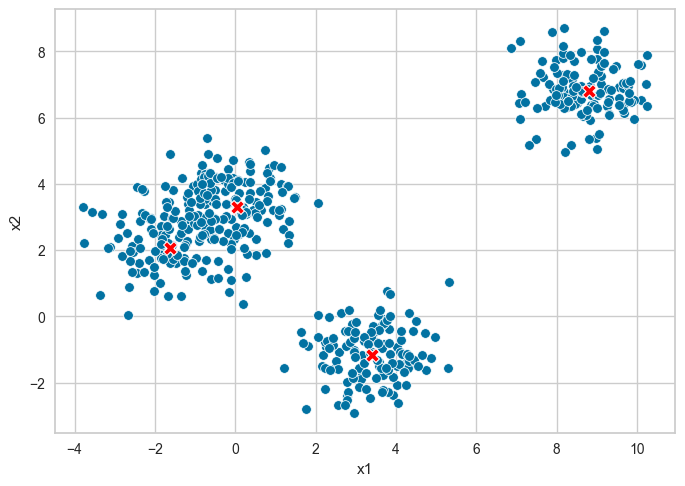

In [68]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_center, x='x1', y='x2', color='red', marker='X', s=100)
plt.show()

### Aplicando K-means

### Aplicación de K-means
Se aplica el algoritmo K-means para agrupar los datos en clusters y se visualizan los resultados junto con los centros calculados por el algoritmo.

In [69]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1': k_means_centers[:, 0],
        'x2': k_means_centers[:, 1]
    }
)


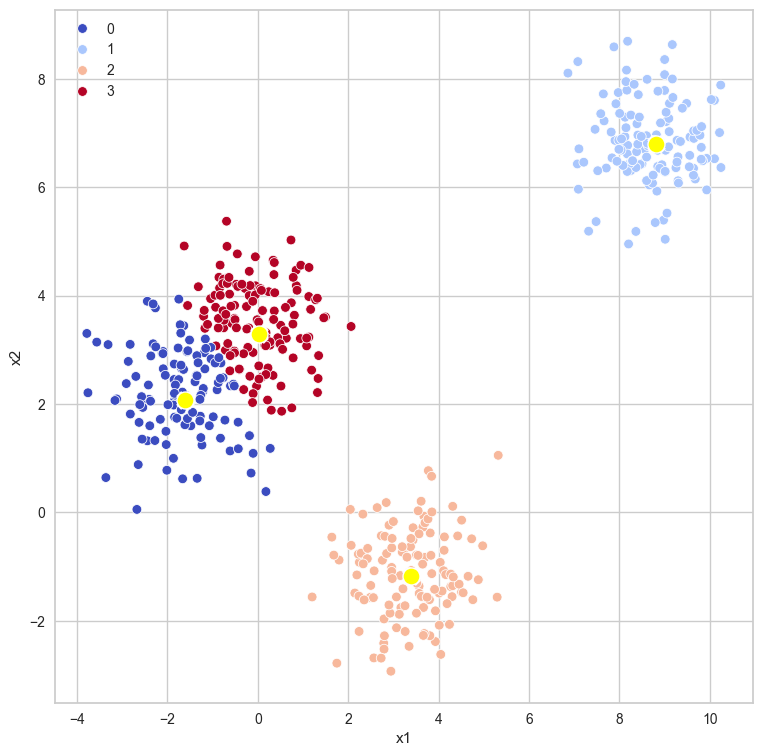

In [70]:
fig = plt.figure(figsize=(9, 9))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_center, x='x1', y='x2', color='red', marker='X', s=150)
sns.scatterplot(data=df_center, x='x1', y='x2', color='yellow', marker='o', s=150)
plt.show()

### Visualización de clusters para diferentes valores de k
Se define una función para visualizar cómo cambia la agrupación al variar el número de clusters.

In [71]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1': k_means_centers[:, 0],
            'x2': k_means_centers[:, 1]
        }
    )

    fig = plt.figure(figsize=(9, 9))
    sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster', palette='coolwarm')
    sns.scatterplot(data=df_center, x='x1', y='x2', color='red', marker='X', s=150)
    sns.scatterplot(data=df_center, x='x1', y='x2', color='yellow', marker='o', s=150)
    plt.show()

3


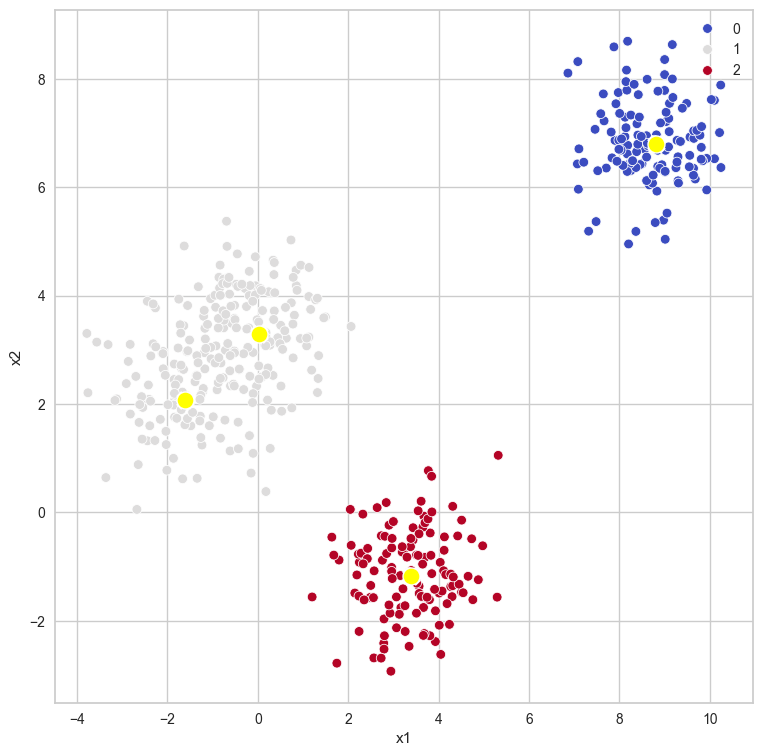

4


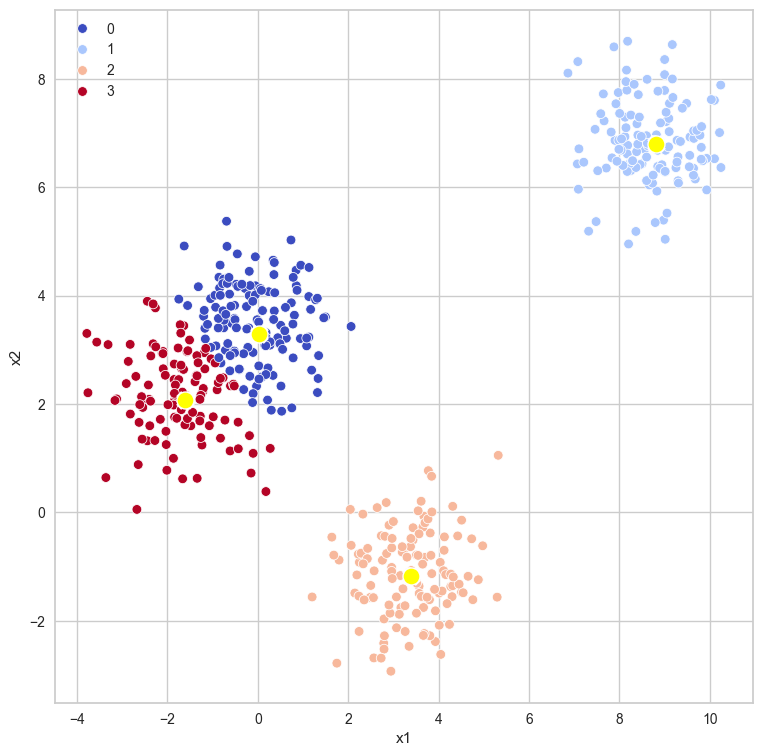

5


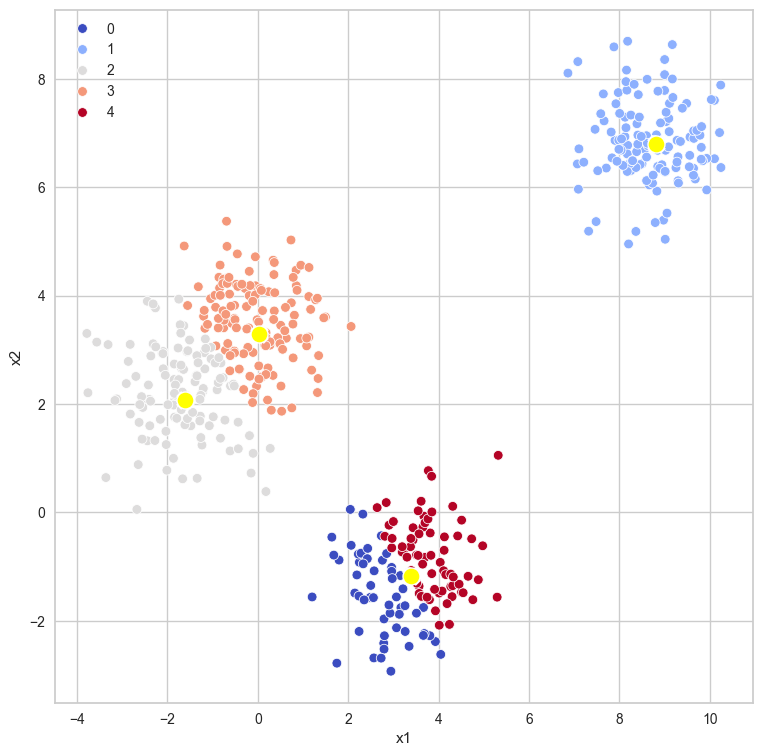

6


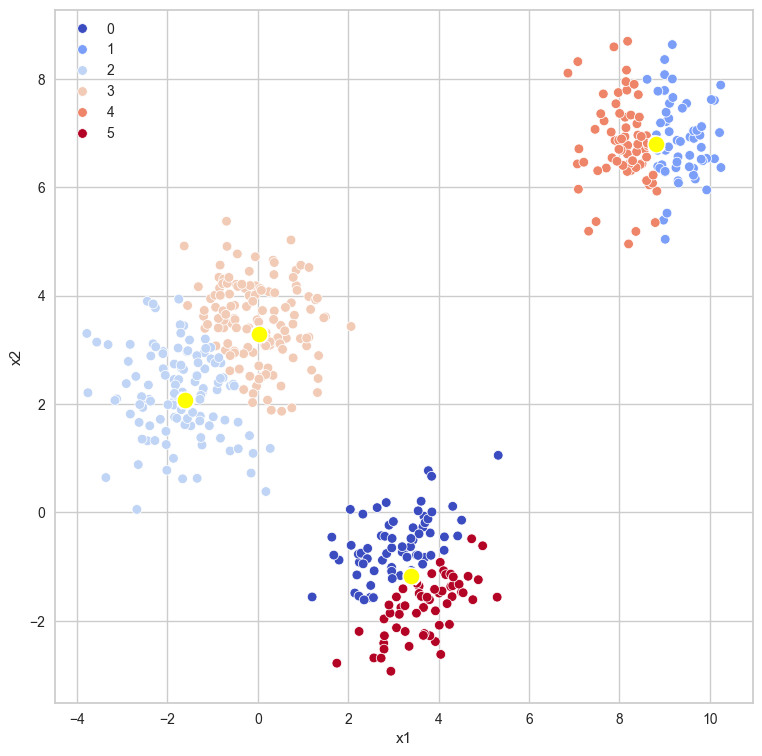

In [72]:
for _ in range(3, 7):
    print(_)
    vis_cluster(_)
    

### Exploración visual de diferentes agrupaciones
Se ejecuta la función de visualización para distintos valores de k, observando cómo se forman los clusters.

## Encontrando el valor de K

### Método del codo para encontrar el valor óptimo de k
Se utiliza el método del codo para determinar el número óptimo de clusters, analizando la suma de distancias cuadradas dentro de los clusters.

In [73]:
sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)    

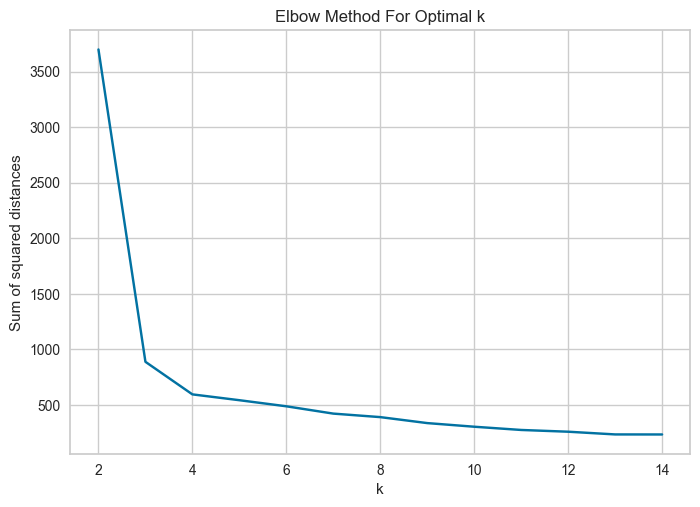

In [74]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Visualización del método del codo
Se grafica la suma de distancias cuadradas para cada valor de k, identificando el punto donde la mejora se estabiliza (elbow).

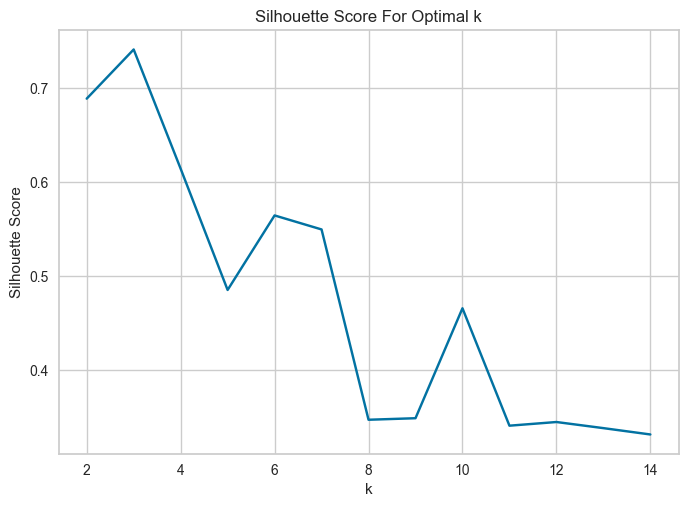

In [75]:
silhouette_scores_list = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    # Use the silhouette_score function from sklearn.metrics
    silhouette_scores_list.append(silhouette_score(X, y_pred))

plt.plot(list(K), silhouette_scores_list, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

### Evaluación de la calidad de los clusters con Silhouette Score
Se calcula el Silhouette Score para diferentes valores de k, ayudando a identificar el número óptimo de clusters según la cohesión y separación de los grupos.

### Evaluando clusters con k-means

### Evaluación final de los clusters
Se visualizan los clusters finales utilizando el valor óptimo de k encontrado en los pasos anteriores.

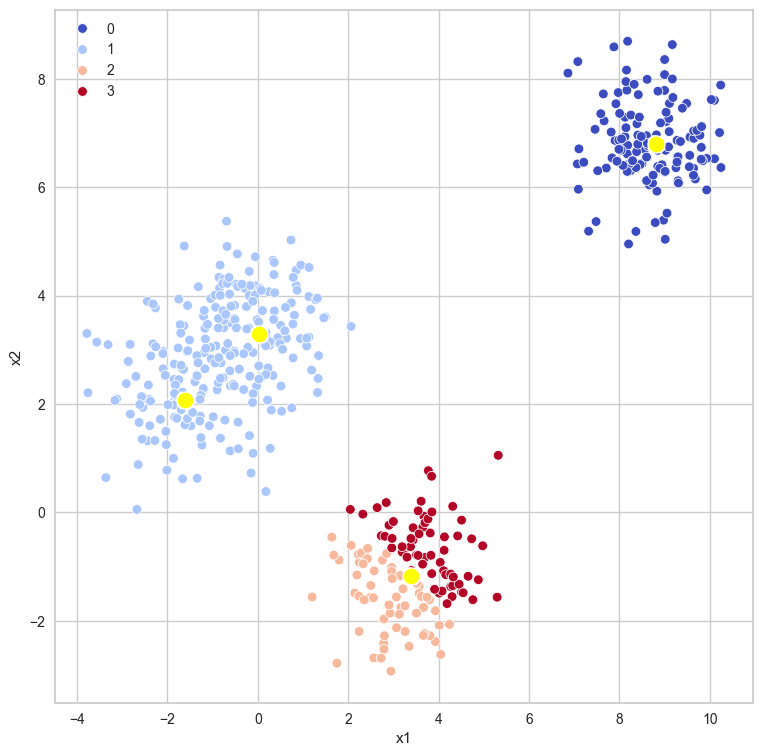

In [76]:
vis_cluster(4)

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

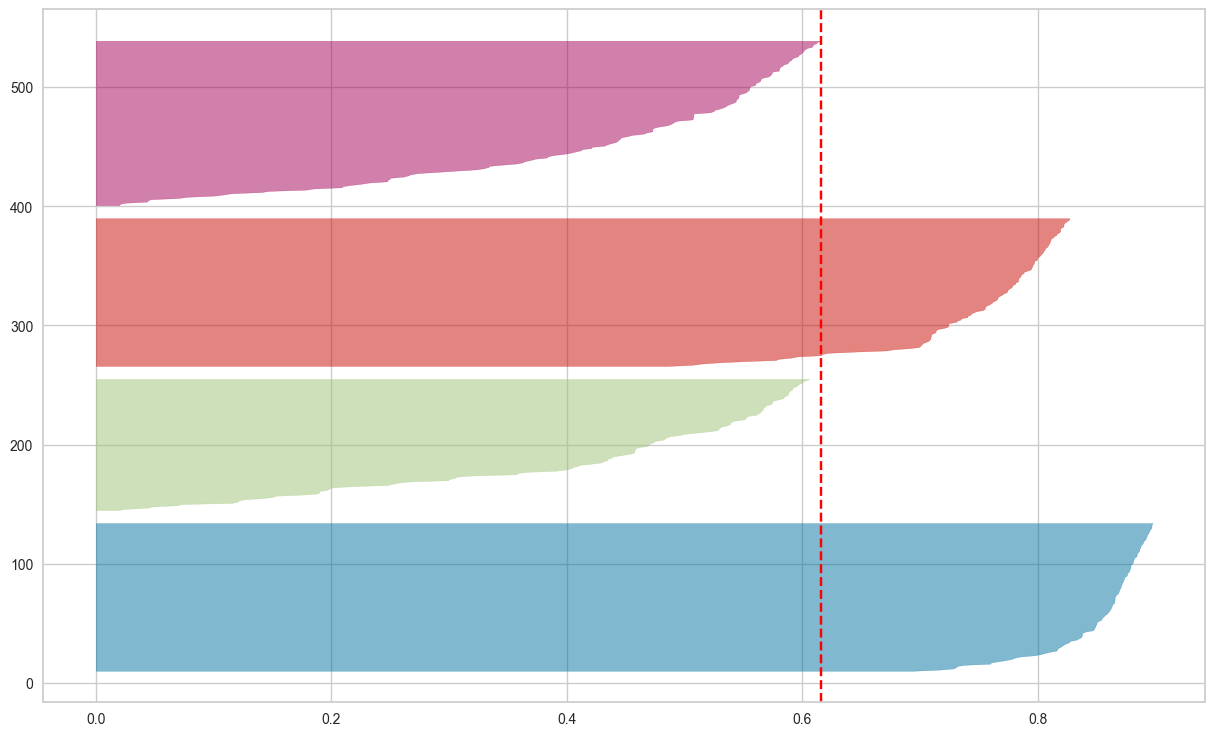

In [77]:
plt.figure(figsize=(15, 9))

km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)



### Visualización del Silhouette Score con Yellowbrick
Se utiliza la librería Yellowbrick para visualizar gráficamente la calidad de los clusters obtenidos con K-means.